## 1. Télécharger les données pour le pays concerné.

In [1]:
#install.packages("forecast")

In [2]:
#install.packages("demography")

In [3]:
#install.packages("StMoMo")

In [2]:
#install.packages("lifecontingencies")

Installing package into ‘/home/safe/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



In [1]:
# Charger les packages nécéssaires
options(warn=-1)
library("forecast")
library("demography")
library("StMoMo")
library("lifecontingencies")

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

This is demography 1.22 


Loading required package: gnm

Package:  lifecontingencies
Authors:  Giorgio Alfredo Spedicato [aut, cre]
    (<https://orcid.org/0000-0002-0315-8888>),
  Christophe Dutang [ctb] (<https://orcid.org/0000-0001-6732-1501>),
  Reinhold Kainhofer [ctb] (<https://orcid.org/0000-0002-7895-1311>),
  Kevin J Owens [ctb],
  Ernesto Schirmacher [ctb],
  Gian Paolo Clemente [ctb] (<https://orcid.org/0000-0001-6795-4595>),
  Ivan Williams [ctb]
Version:  1.3.6
Date:     2019-03-05 23:50:03 UTC
BugReport: http://github.com/spedygiorgio/lifecontingencies/issues




In [2]:
#Telecharger les données de la population britanique
ukdemo<-hmd.mx(country="GBR_NP", username="iheb.mensi@esprit.tn",password="1587058007",label="U.K")

In [3]:
ukdemo

Mortality data for U.K
    Series: female male total
    Years: 1922 - 2016
    Ages:  0 - 110 

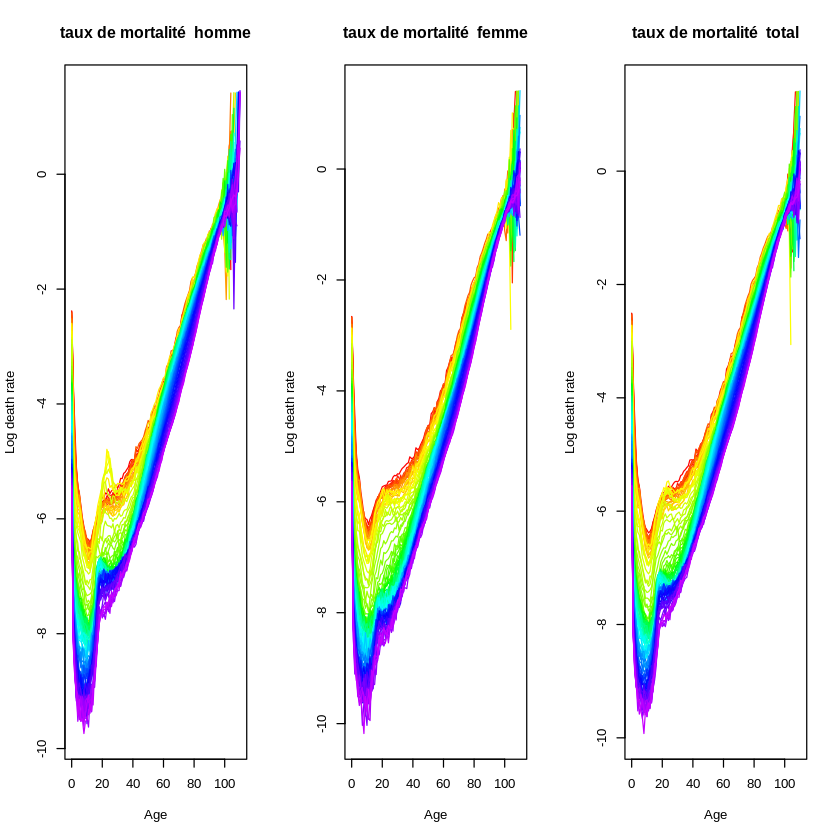

In [4]:
# Visualisation du comportement du taux de mortalité de la population britanique pour les hommes, les femmes et la totalité de la population en fonction d'age
par(mfrow=c(1,3))
plot(ukdemo,series="male",datatype="rate", main="taux de mortalité  homme")
plot(ukdemo,series="female",datatype="rate", main="taux de mortalité  femme")
plot(ukdemo,"total",datatype="rate", main="taux de mortalité  total")

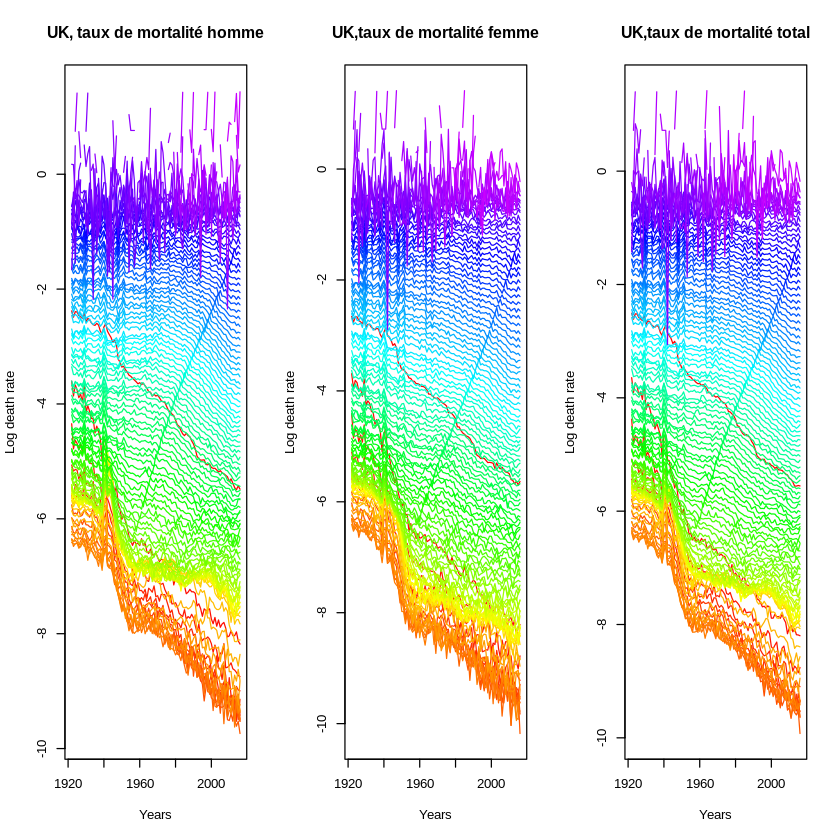

In [5]:
# Visualisation du comportement du taux de mortalité de la population britanique pour les hommes, les femmes et la totalité de la population en fonction d'age
par(mfrow=c(1,3))
plot(ukdemo,series="male",datatype="rate",plot.type="time", main="UK, taux de mortalité homme",xlab="Years")
plot(ukdemo,series="female",datatype="rate",plot.type="time", main="UK,taux de mortalité femme",xlab="Years")
plot(ukdemo,series="total",datatype="rate",plot.type="time", main="UK,taux de mortalité total",xlab="Years")

In [6]:
# Afficher les taux de mortalité de la population totale britanique pour les années de 1922-1927
head(ukdemo$rate$total[, 1:6])

,1922,1923,1924,1925,1926,1927
0,0.081500,0.073306,0.080602,0.080413,0.075389,0.073641
1,0.026130,0.020113,0.023834,0.022358,0.019343,0.020380
2,0.012566,0.008106,0.009442,0.009013,0.007853,0.008665
3,0.006199,0.005457,0.005692,0.005689,0.004872,0.005194
4,0.004365,0.003448,0.004332,0.004135,0.003739,0.003815
5,0.003821,0.003138,0.003292,0.003824,0.003365,0.003224


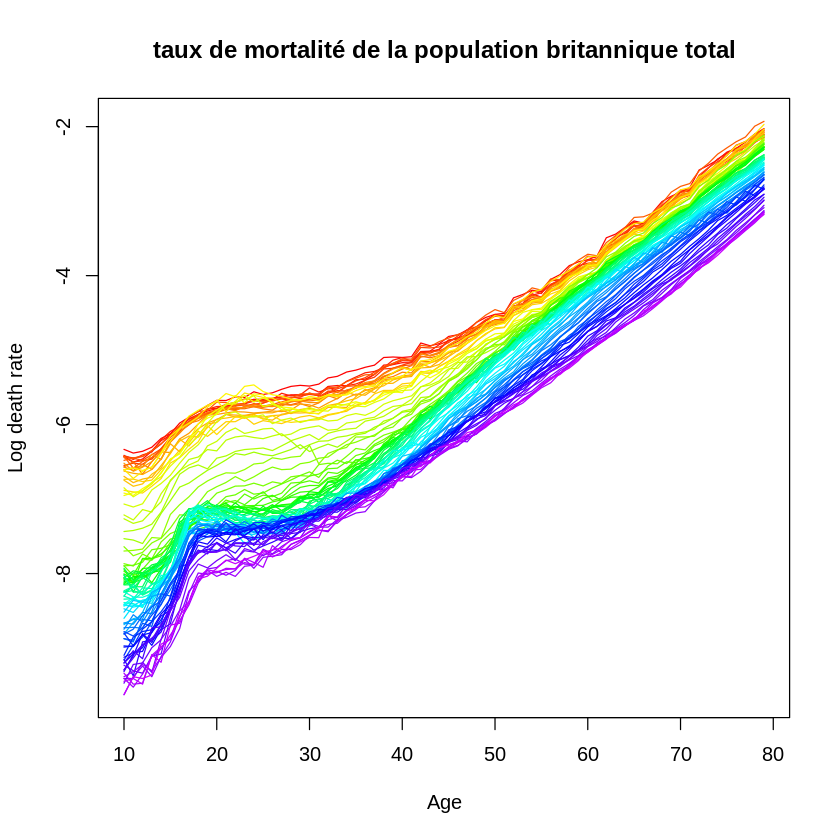

In [7]:
# Autre méthode de visualisation du taux de mortalité de la population britanique total entre l'age de 11-80
plot(x=ukdemo,series=names(ukdemo$rate)[3],ages=ukdemo$age[11:80],years=ukdemo$year,max.age=max(ukdemo$age),plot.type="functions",main="taux de mortalité de la population britannique total")

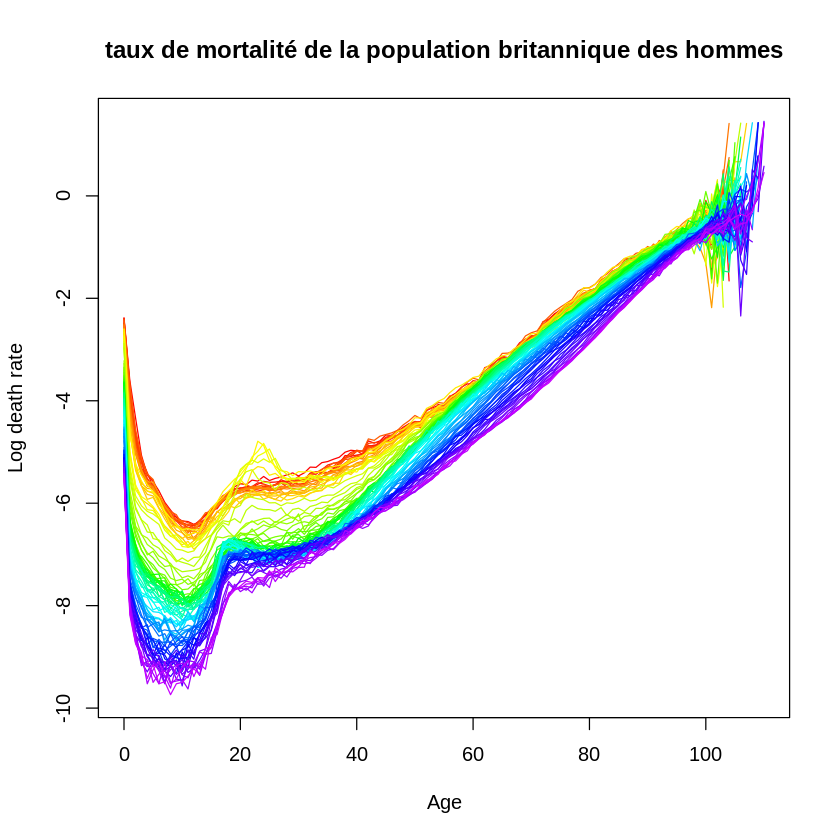

In [8]:
# Visualisation du comportement du taux de mortalité de la population britanique pour les hommes de la population en fonction d'age
plot(ukdemo,series="male",datatype="rate", main="taux de mortalité de la population britannique des hommes")

### On remarque la présence du pic de taux de mortalité pour les age entre 20-40 et cela est expliqué par la mortalité fort pendant les périodes du querre mondial

## 3. Estimer les paramètres d’un modèle de Lee-Carter à partir des données historiques téléchargées (on pourra utiliser la fonction fit du package StMoMo). On prendra bien soin de :
## — Commenter/justifier le choix de la plage d’âge et de la période choisie pour calibrer les données.
## — Commenter les résultats obtenus en affichant les paramètres estimés.

In [9]:
# Charger les données britanique de la population total pour le package StMoMo
uk.StMoMoData<-StMoMoData(data=ukdemo, series = "total")
uk.StMoMoDatam<-StMoMoData(data=ukdemo, series = "male")
uk.StMoMoDataf<-StMoMoData(data=ukdemo, series = "female")

In [10]:
summary(uk.StMoMoDatam)

Mortality data for U.K
    Series:  male
    Years: 1922 - 2016
    Ages:  0 - 110
    Exposure:  central 


In [11]:
#Transformez les données StMoMo des expositions centrales en expositions initiales afin d'avoir une meilleur résultat d'apprentissage
#NB : Les expositions initiales sont calculées en ajoutant la moitié des décès aux expositions centrales.
uk.StMoMoData.Ini<-central2initial(uk.StMoMoData)
uk.StMoMoData.Inim<-central2initial(uk.StMoMoDatam)
uk.StMoMoData.Inif<-central2initial(uk.StMoMoDataf)

In [12]:
#Génère une matrice de pondération en fonction d'un groupe d'âges et d'années
ages.fit = 0:80
wxt <- genWeightMat(ages = ages.fit, years = uk.StMoMoData.Ini$years)
wxtm <- genWeightMat(ages = ages.fit, years = uk.StMoMoData.Inim$years)
wxtf <- genWeightMat(ages = ages.fit, years = uk.StMoMoData.Inif$years)

# passer les données par l'apprentissage de Lee-Carter
## LC
LC <- lc(link = "logit")
LCfit <- fit(LC, data = uk.StMoMoData.Ini, ages.fit = ages.fit, wxt = wxt)
LCfitm <- fit(LC, data = uk.StMoMoData.Inim, ages.fit = ages.fit, wxt = wxtm)
LCfitf <- fit(LC, data = uk.StMoMoData.Inif, ages.fit = ages.fit, wxt = wxtf)

StMoMo: Start fitting with gnm
Initialising
Running start-up iterations..
Running main iterations............
Done
StMoMo: Finish fitting with gnm
StMoMo: Start fitting with gnm
Initialising
Running start-up iterations..
Running main iterations..................
Done
StMoMo: Finish fitting with gnm
StMoMo: Start fitting with gnm
Initialising
Running start-up iterations..
Running main iterations............
Done
StMoMo: Finish fitting with gnm


In [13]:
# Afficher les paramétre du modéle lee carter entrainé
head(LCfitf)

$model
Binomial model with predictor: logit q[x,t] = a[x] + b1[x] k1[t]
$ax
        0         1         2         3         4         5         6         7 
-4.130566 -6.747754 -7.276492 -7.510684 -7.712468 -7.834856 -7.973178 -8.112225 
        8         9        10        11        12        13        14        15 
-8.180777 -8.245330 -8.251249 -8.268313 -8.174054 -8.109607 -7.995827 -7.840974 
       16        17        18        19        20        21        22        23 
-7.655663 -7.537779 -7.459836 -7.415911 -7.397404 -7.357481 -7.344572 -7.310321 
       24        25        26        27        28        29        30        31 
-7.288783 -7.249361 -7.202923 -7.168199 -7.113999 -7.068596 -7.009585 -6.973189 
       32        33        34        35        36        37        38        39 
-6.886310 -6.838100 -6.756083 -6.685429 -6.617919 -6.547302 -6.451461 -6.374250 
       40        41        42        43        44        45        46        47 
-6.293957 -6.228621 -6.104564 -6.

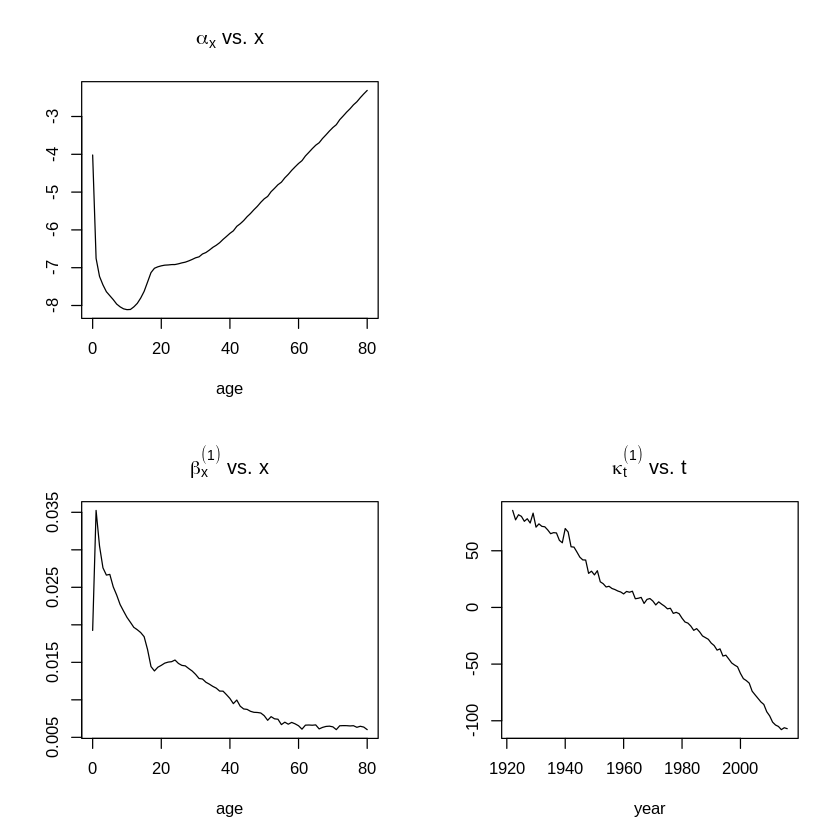

In [14]:
plot(LCfit)

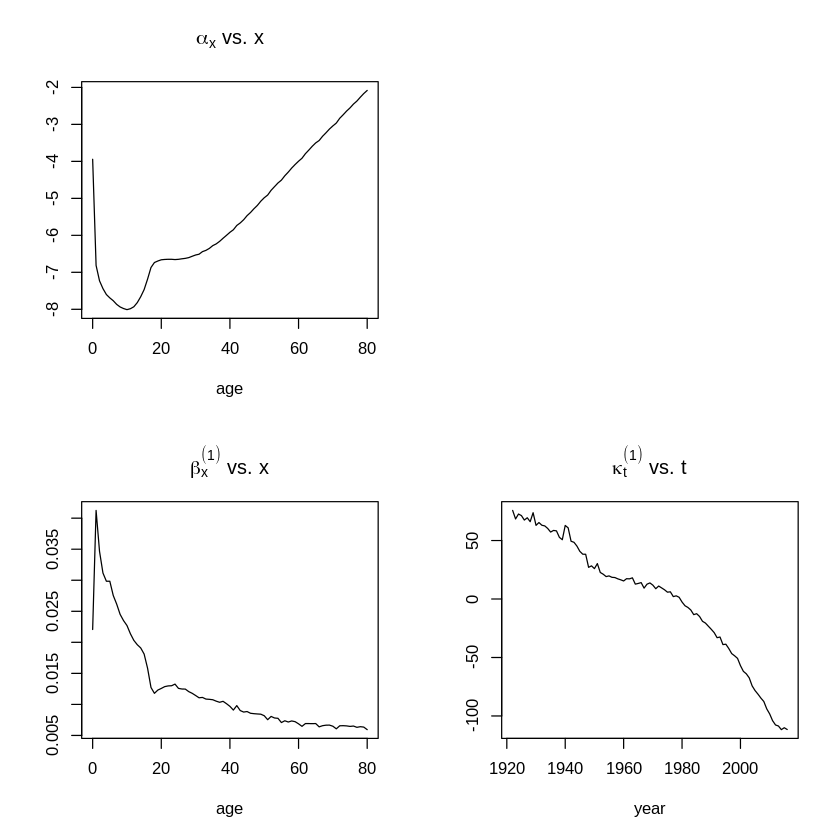

In [15]:
#Visualiser les paramétres de lee carter
plot(LCfitm)

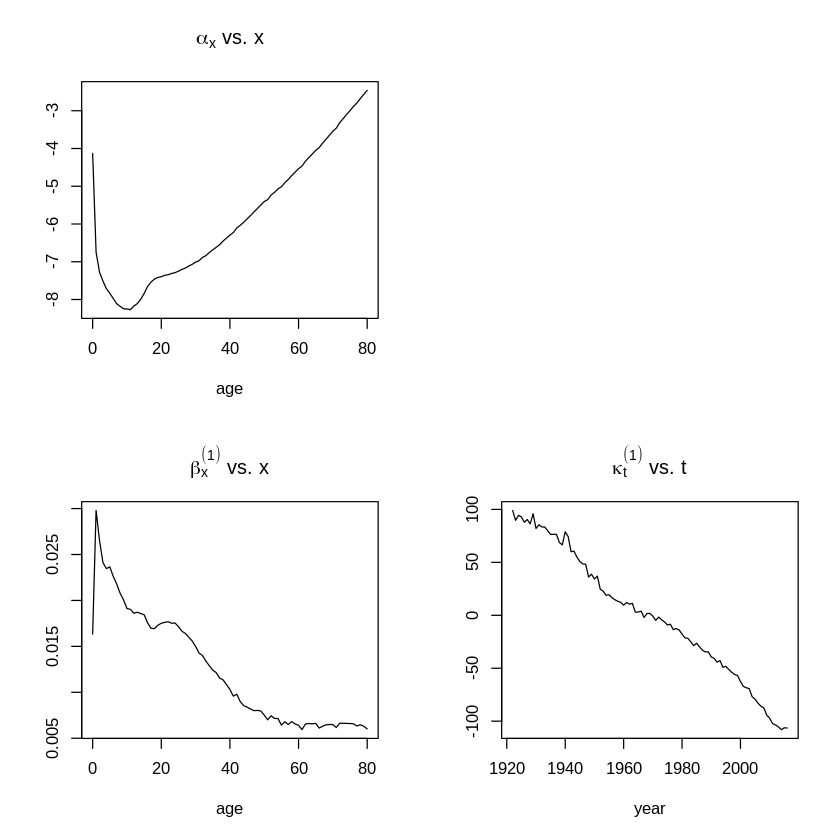

In [16]:
#Visualiser les paramétres de lee carter
plot(LCfitf)

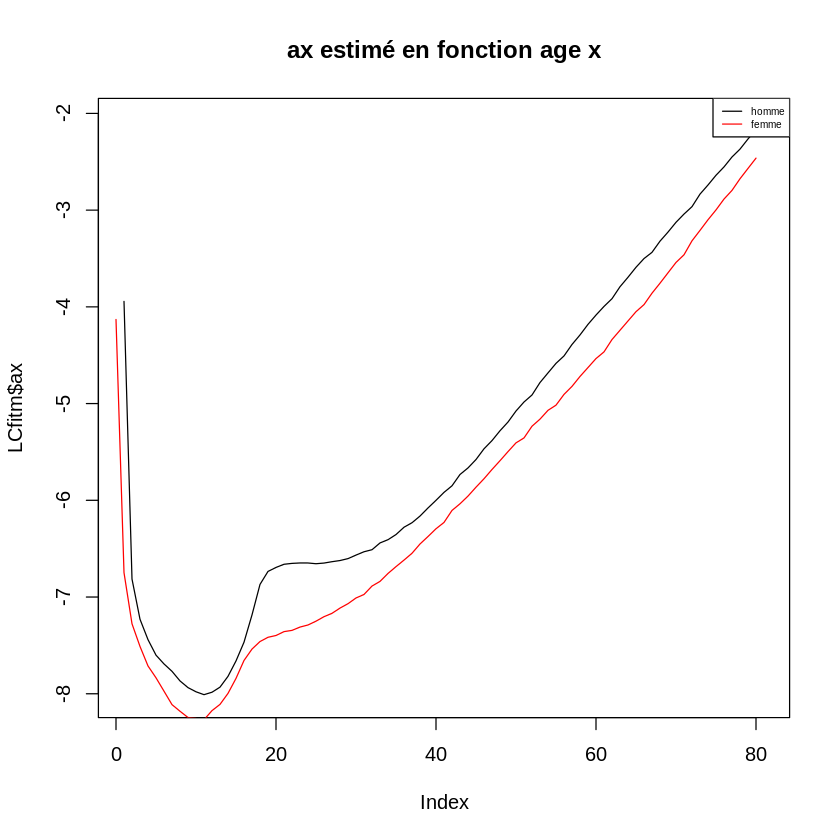

In [17]:
# Visualiser le comportement de taux moyen log de mortalité pour homme et femme
plot(LCfitm$ax,type="l",,xlabel="ax",main="ax estimé en fonction age x")
lines(x = ages.fit, y = LCfitf$ax, col = "red")
legend("topright" , c("homme","femme"), cex=0.5,col=c("black","red"),lty=1);

### On remarque que le taux de mortalité chez les hommes est plus fort que chez les femmes puisque la courbe des hommes est toujours au dessus de celle des femmes. On remarque aussi la présence de courbure à l'age de 17-18 ans chez les femmes et la présence de cette courbure 20-23

### En observant les paramétre estimé, la mortalité moyenne augmente lorsque l'âge augmente ce qui est vérifier dans le schema de ax. On remarque aussi la présence d'une faible pic entre l'age de 19-30. On peut expliqué ce comportement en raison de décés accidentales. 
### bx montre plutôt une plus grande valeur pour les jeunes âges de 0-20 ans et une faible amélioration pour la tranche d'âge (60-80).
### Enfin, comme il est  prévu, kt qui représente l'evolution du taux de mortalité a une tendance à la baisse avec l'augmentation du temps. On peut expliqué ce comportement par l'evolution des services de la santé et l'absence des guerres pendans ces dernieres années 

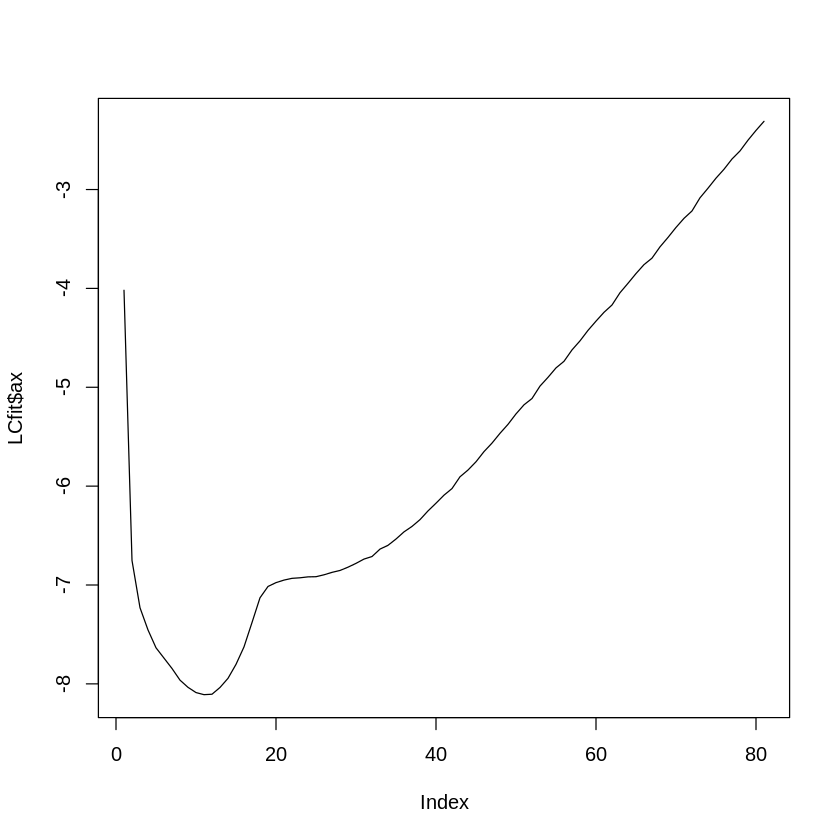

In [18]:
plot(LCfit$ax,type="l")

## 5. Estimer les paramètres d’un modèle de CBD à partir des données historiques téléchargées (on pourra utiliser la fonction fit du package StMoMo). On prendra bien soin de :
## — Commenter/justifier le choix de la plage d’âge et de la période choisie pour calibrer les données.
## — Commenter les résultats obtenus en affichant les paramètres estimés.

## CBD

In [19]:
# passer les données par l'apprentissage de Cairns Blake Dowd
ages.fit=0:89
wxt <- genWeightMat(ages = ages.fit, years = uk.StMoMoData.Ini$years)
wxtm <- genWeightMat(ages = ages.fit, years = uk.StMoMoData.Inim$years)
wxtf <- genWeightMat(ages = ages.fit, years = uk.StMoMoData.Inif$years)
CBD <- cbd(link = "logit")
wxtm <- genWeightMat(ages = ages.fit, years = uk.StMoMoData.Inim$years)
wxtf <- genWeightMat(ages = ages.fit, years = uk.StMoMoData.Inif$years)
CBDfit <- fit(CBD, data = uk.StMoMoData.Ini, ages.fit = ages.fit, wxt = wxt)
CBDfitm <- fit(CBD, data = uk.StMoMoData.Inim, ages.fit = ages.fit, wxt = wxtm)
CBDfitf <- fit(CBD, data = uk.StMoMoData.Inif, ages.fit = ages.fit, wxt = wxtf)

StMoMo: Start fitting with gnm
StMoMo: Finish fitting with gnm
StMoMo: Start fitting with gnm
StMoMo: Finish fitting with gnm
StMoMo: Start fitting with gnm
StMoMo: Finish fitting with gnm


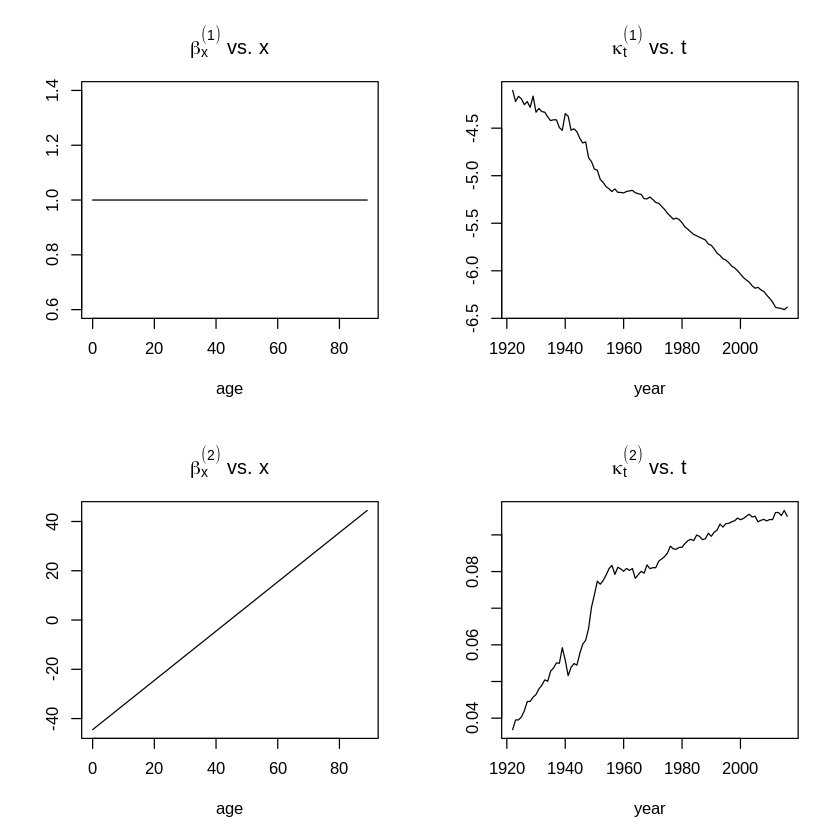

In [20]:
plot(CBDfit)

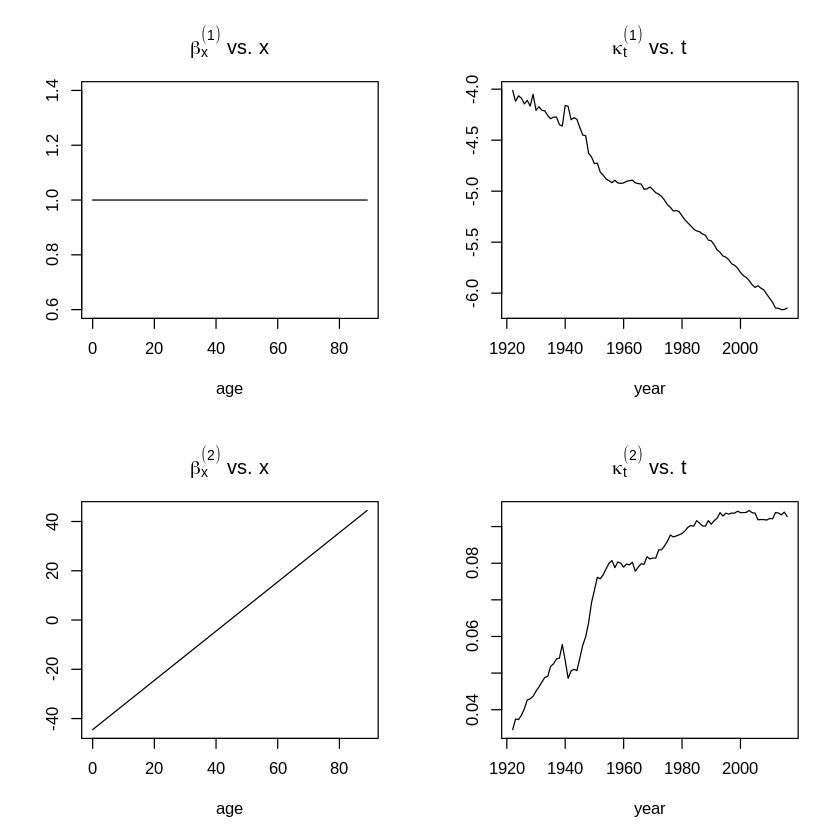

In [21]:
plot(CBDfitm)

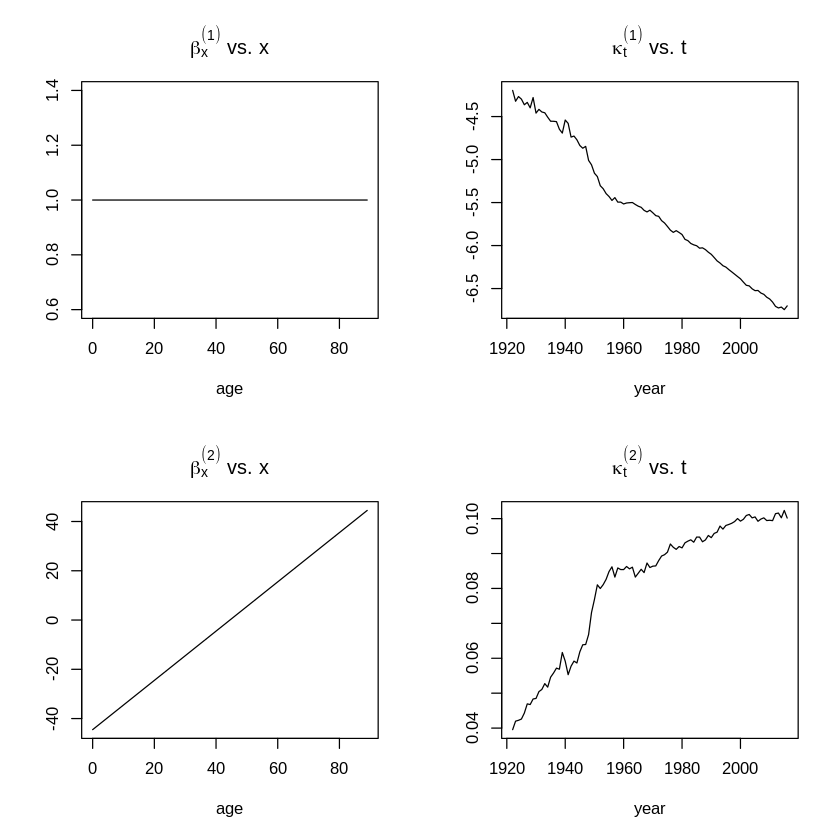

In [22]:
plot(CBDfitf)

### L'indice du temps kt(1) diminue au cours du temps. Cela signifie que le taux de mortalité a diminué au fil du temps pour tous les âges.
### L'indice du temps kt(2) augmente de plus en plus au cours du temps. Cela signifie que le taux de mortalité aux ages plus jeunes  s'améliore rapidement que pour les personnes plus agés

## 6. Pour différentes années, comparer les log taux de mortalité estimés par les deux modèles. Commenter les résultats.

In [23]:
# log de taux de motalité estimé par le modéle de Lee-carter
k= fitted(LCfit, type = "rates")
km= fitted(LCfitm, type = "rates")
kf= fitted(LCfitf, type = "rates")

In [24]:
head(k)

,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,⋯,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,0.085408145,0.073752019,0.079851250,0.077889572,0.072049112,0.075014712,0.070155000,0.081878259,0.065706196,0.069182425,⋯,3.595533e-03,3.446826e-03,3.046081e-03,2.838969e-03,2.554713e-03,2.432199e-03,2.373721e-03,2.248772e-03,2.322793e-03,2.285852e-03
1,0.023295770,0.017504054,0.020429438,0.019463436,0.016728306,0.018090804,0.015886407,0.021452716,0.013995478,0.015462672,⋯,6.184628e-05,5.722968e-05,4.560975e-05,4.007944e-05,3.302436e-05,3.017679e-05,2.885901e-05,2.613358e-05,2.773326e-05,2.692950e-05
2,0.009764878,0.007602162,0.008703088,0.008341642,0.007306826,0.007824545,0.006984507,0.009083905,0.006253065,0.006821534,⋯,5.692516e-05,5.322798e-05,4.373436e-05,3.910491e-05,3.307083e-05,3.058770e-05,2.942805e-05,2.700654e-05,2.843174e-05,2.771708e-05
3,0.006101572,0.004861606,0.005496243,0.005288722,0.004690000,0.004990428,0.004501999,0.005714060,0.004072382,0.004406644,⋯,5.797663e-05,5.455993e-05,4.567770e-05,4.128127e-05,3.547463e-05,3.305650e-05,3.192085e-05,2.953544e-05,3.094175e-05,3.023742e-05
4,0.004696518,0.003770932,0.004245512,0.004090535,0.003642268,0.003867420,0.003501134,0.004407975,0.003177873,0.003429477,⋯,5.246287e-05,4.947618e-05,4.167997e-05,3.780198e-05,3.265755e-05,3.050674e-05,2.949475e-05,2.736493e-05,2.862126e-05,2.799230e-05
5,0.004264949,0.003421533,0.003853884,0.003712674,0.003304355,0.003509418,0.003175840,0.004001938,0.002881565,0.003110598,⋯,4.688902e-05,4.421070e-05,3.722217e-05,3.374757e-05,2.914019e-05,2.721464e-05,2.630880e-05,2.440272e-05,2.552701e-05,2.496414e-05


In [25]:
# log de taux de motalité estimé par le modéle de Cairns Blake Dowd
c=fitted(CBDfit, type = "rates" )
cm=fitted(CBDfitm, type = "rates" )
cf=fitted(CBDfitf, type = "rates" )
head(c)

,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,⋯,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,0.003192607,0.002530579,0.002666176,0.002509510,0.002188787,0.002020912,0.001899191,0.002030861,0.001659938,0.001611888,⋯,3.097063e-05,3.008011e-05,2.949547e-05,2.805537e-05,2.701050e-05,2.347846e-05,2.326007e-05,2.402682e-05,2.231030e-05,2.457242e-05
1,0.003312100,0.002632261,0.002773396,0.002612438,0.002282477,0.002112725,0.001985588,0.002125649,0.001738726,0.001691019,⋯,3.402238e-05,3.305257e-05,3.239672e-05,3.082639e-05,2.967768e-05,2.584650e-05,2.560654e-05,2.642874e-05,2.457470e-05,2.702350e-05
2,0.003436049,0.002738016,0.002884916,0.002719577,0.002380168,0.002208699,0.002075907,0.002224851,0.001821247,0.001774028,⋯,3.737483e-05,3.631876e-05,3.558332e-05,3.387109e-05,3.260824e-05,2.845338e-05,2.818972e-05,2.907077e-05,2.706892e-05,2.971906e-05
3,0.003564620,0.002848009,0.003000907,0.002831097,0.002482030,0.002309023,0.002170326,0.002328672,0.001907677,0.001861104,⋯,4.105761e-05,3.990768e-05,3.908335e-05,3.721651e-05,3.582816e-05,3.132318e-05,3.103348e-05,3.197691e-05,2.981629e-05,3.268348e-05
4,0.003697984,0.002962407,0.003121547,0.002947176,0.002588240,0.002413893,0.002269029,0.002437326,0.001998200,0.001952446,⋯,4.510326e-05,4.385125e-05,4.292764e-05,4.089233e-05,3.936602e-05,3.448242e-05,3.416410e-05,3.517355e-05,3.284249e-05,3.594360e-05
5,0.003836319,0.003081386,0.003247021,0.003068000,0.002698982,0.002523514,0.002372211,0.002551037,0.002093010,0.002048262,⋯,4.954752e-05,4.818448e-05,4.715004e-05,4.493120e-05,4.325322e-05,3.796028e-05,3.761053e-05,3.868975e-05,3.617583e-05,3.952889e-05


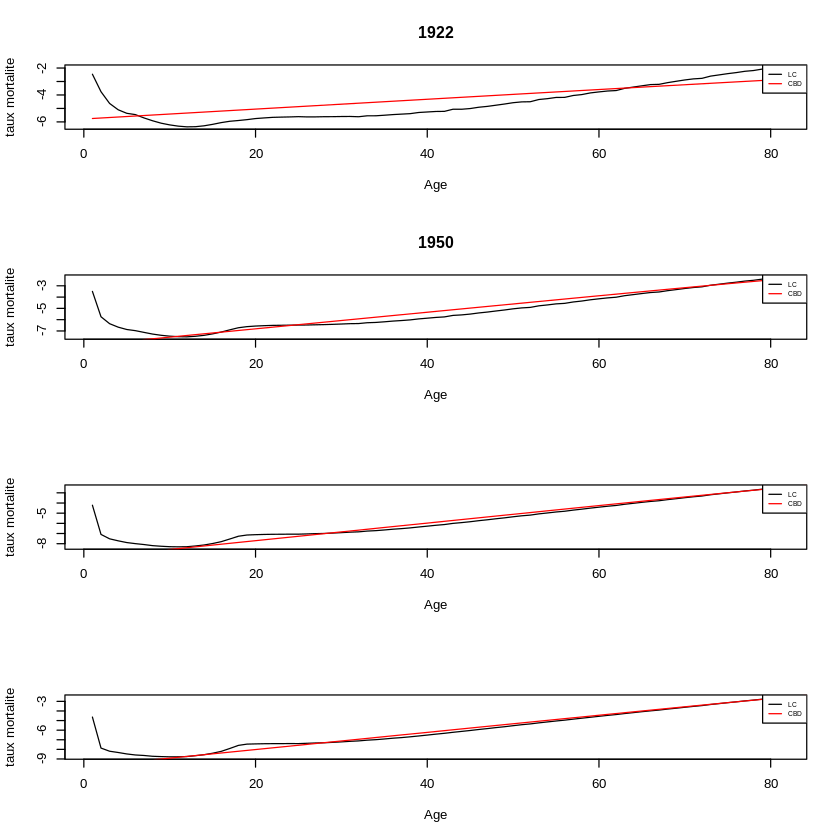

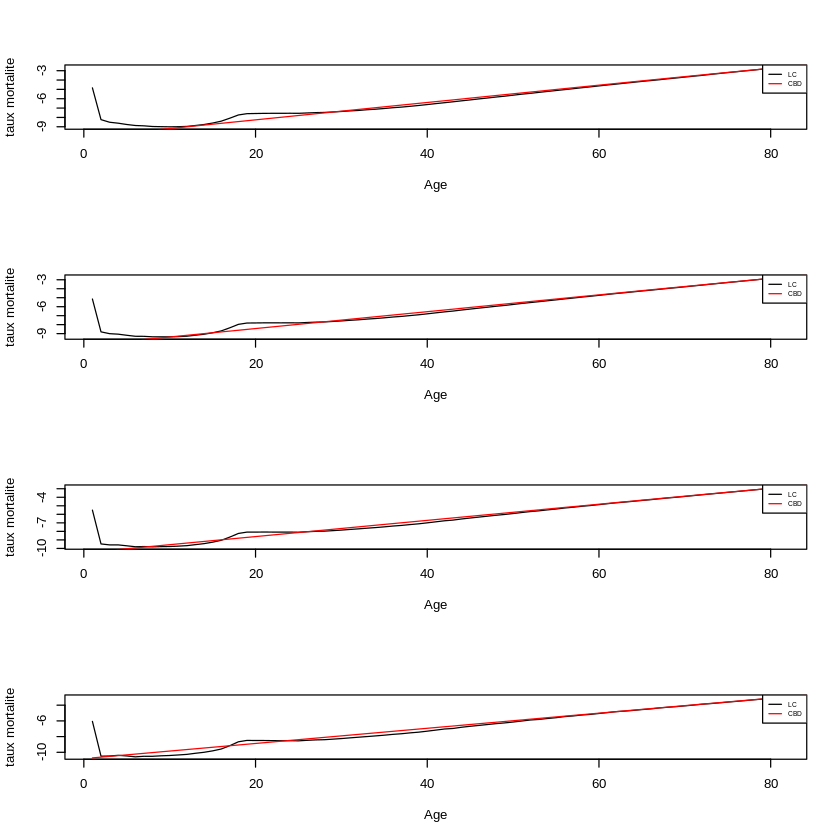

In [26]:
# Afficher le log taux de mortalité en fonction d'age pour les deux modéles lee carter et Cairns Blake Dowd 
# pour les années 1922,1950,1980,1990,1995,2000,2005,2015
par(mfrow=c(4,1))
plot(log(k[, c('1922')]),type="l",xlab="Age",ylab="taux mortalite",main="1922")
lines(log(c[, c('1922')]),type="l", col="red")
legend("topright" , c("LC","CBD"), cex=0.5,col=c("black","red"),lty=1);
plot(log(k[, c('1950')]),type="l",xlab="Age",ylab="taux mortalite",main='1950')
lines(log(c[, c('1950')]),type="l", col="red")
legend("topright" , c("LC","CBD"), cex=0.5,col=c("black","red"),lty=1);
plot(log(k[, c('1980')]),type="l",xlab="Age",ylab="taux mortalite")
lines(log(c[, c('1980')]),type="l", col="red")
legend("topright" , c("LC","CBD"), cex=0.5,col=c("black","red"),lty=1);
plot(log(k[, c('1990')]),type="l",xlab="Age",ylab="taux mortalite")
lines(log(c[, c('1990')]),type="l", col="red")
legend("topright" , c("LC","CBD"), cex=0.5,col=c("black","red"),lty=1);
plot(log(k[, c('1995')]),type="l",xlab="Age",ylab="taux mortalite")
lines(log(c[, c('1995')]),type="l", col="red")
legend("topright" , c("LC","CBD"), cex=0.5,col=c("black","red"),lty=1);
plot(log(k[, c('2000')]),type="l",xlab="Age",ylab="taux mortalite")
lines(log(c[, c('2000')]),type="l", col="red")
legend("topright" , c("LC","CBD"), cex=0.5,col=c("black","red"),lty=1);
plot(log(k[, c('2005')]),type="l",xlab="Age",ylab="taux mortalite")
lines(log(c[, c('2005')]),type="l", col="red")
legend("topright" , c("LC","CBD"), cex=0.5,col=c("black","red"),lty=1);
plot(log(k[, c('2015')]),type="l",xlab="Age",ylab="taux mortalite")
lines(log(c[, c('2015')]),type="l", col="red")
legend("topright" , c("LC","CBD"), cex=0.5,col=c("black","red"),lty=1);

### En comparant le log taux de mortalité pour les deux modéles de Lee Carter et de Cairns Blake Dowd, on remarque que les deux modéles ont un comportement différent sur l'intervalle d'age entre 0 et 20 ans : 
### Lee carter presente une décroissance forte et rapide de l'age 0 à 2-3 ans puis il commence à croitre lentement jusqu'à 20 ans
### Cairns Blake Dowd présente une relation linéaire entre l'age et le log de taux de mortalité plus l'age augmente le comportement moyen du taux de mortalité augmente pour tous les ages. Cela est expliqué par l'hypothése de Cairns Blake Dowd que  le taux de mortalité moyen est constant chaque année d'âge c'est-à-dire de l'âge x à x + 1.
### De plus, on remarque qu'à partir l'age de 20 ans les deux modéles deviennent de plus en plus proche de comportement et de valeur de taux de mortalité.

## 8. Dans les deux cas, projeter les taux de mortalité à l’aide de la fonction forecast.

### forcast Lee-carter ARIMA

In [92]:
# projection du taux de mortalité en utilisant le modéle lee carter pour les prochaines 50 année
nba=50
LCfor <- forecast(LCfit, h = nba,kt.method = "iarima")
LCform <- forecast(LCfitm, h = nba,kt.method = "iarima")
LCforf <- forecast(LCfitf, h = nba,kt.method = "iarima")

Stochastic Mortality Model forecast
Call: forecast.fitStMoMo(object = LCfit, h = nba, kt.method = "iarima")

Binomial model with predictor: logit q[x,t] = a[x] + b1[x] k1[t]

kt model: iarima
   kt[1]: ARIMA(2,1,2) with drift
Jump-off method: fit
Data:  U.K
Series:  total
Years in forecast: 2017 - 2066
Ages in forecast: 0 - 80 

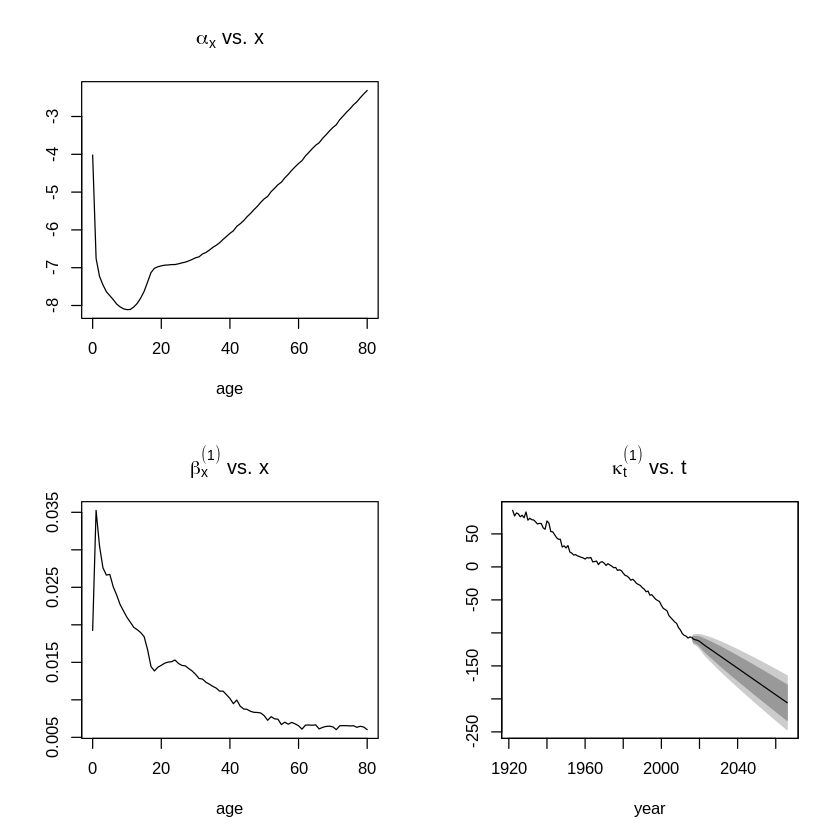

In [93]:
# Visualiser la projection 
plot(LCfor)
LCfor

Stochastic Mortality Model forecast
Call: forecast.fitStMoMo(object = LCfitm, h = nba, kt.method = "iarima")

Binomial model with predictor: logit q[x,t] = a[x] + b1[x] k1[t]

kt model: iarima
   kt[1]: ARIMA(0,2,2)
Jump-off method: fit
Data:  U.K
Series:  male
Years in forecast: 2017 - 2066
Ages in forecast: 0 - 80 

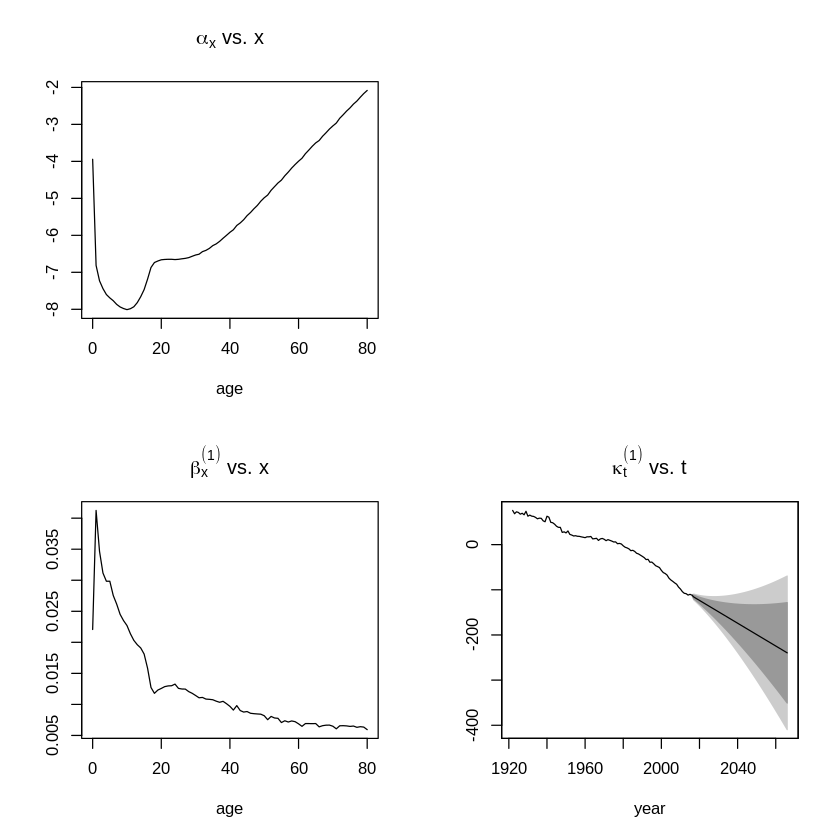

In [94]:
plot(LCform)
LCform

Stochastic Mortality Model forecast
Call: forecast.fitStMoMo(object = LCfitf, h = nba, kt.method = "iarima")

Binomial model with predictor: logit q[x,t] = a[x] + b1[x] k1[t]

kt model: iarima
   kt[1]: ARIMA(0,1,1) with drift
Jump-off method: fit
Data:  U.K
Series:  female
Years in forecast: 2017 - 2066
Ages in forecast: 0 - 80 

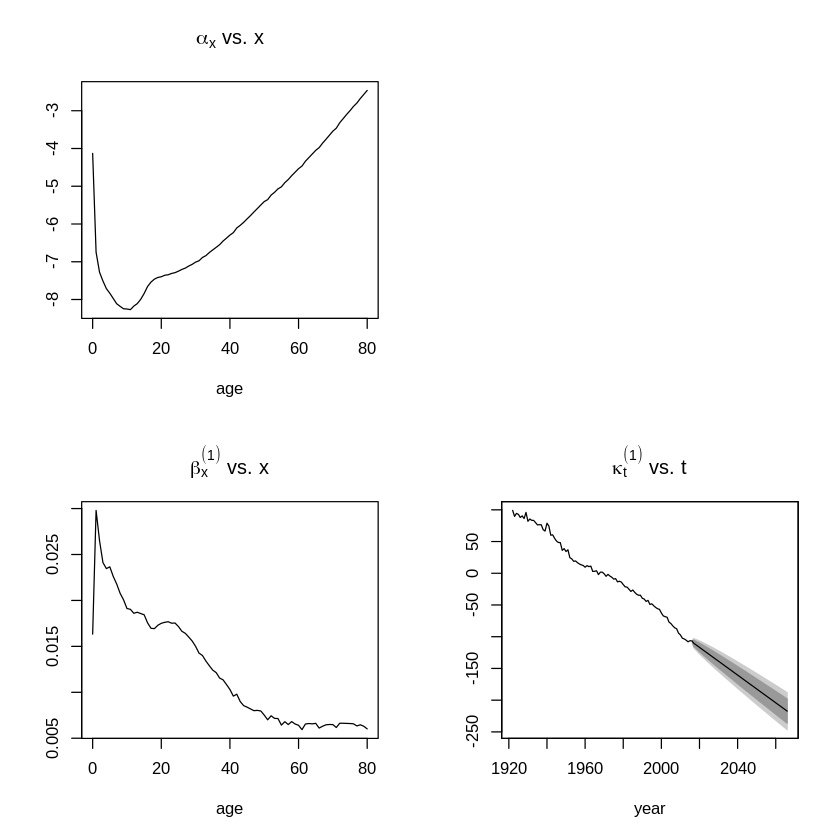

In [95]:
plot(LCforf)
LCforf

### On remarque que la projection ne concerne que le paramétre kt puisque il est le seul paramétre dans le modéle lee Carter qui dépend du temps. le paramétre kt va continuer à diminuer selon la projection de lee carter pendant les prochaines 50 années.

In [42]:
# Afficher les valeurs de taux de mortalité pour la projection de 50 ans
head(LCfor$rates)

,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,⋯,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066
0,2.197639e-03,2.112824e-03,2.031274e-03,1.952867e-03,1.877480e-03,1.804998e-03,1.735310e-03,1.668307e-03,1.603888e-03,1.541952e-03,⋯,4.544752e-04,4.369058e-04,4.200152e-04,4.037773e-04,3.881670e-04,3.731600e-04,3.587329e-04,3.448634e-04,3.315300e-04,3.187119e-04
1,2.505389e-05,2.330891e-05,2.168546e-05,2.017509e-05,1.876990e-05,1.746259e-05,1.624633e-05,1.511477e-05,1.406203e-05,1.308262e-05,⋯,1.395489e-06,1.298292e-06,1.207865e-06,1.123737e-06,1.045468e-06,9.726501e-07,9.049044e-07,8.418772e-07,7.832399e-07,7.286867e-07
2,2.603803e-05,2.446069e-05,2.297890e-05,2.158687e-05,2.027917e-05,1.905069e-05,1.789662e-05,1.681246e-05,1.579399e-05,1.483720e-05,⋯,2.138034e-06,2.008512e-06,1.886837e-06,1.772533e-06,1.665154e-06,1.564279e-06,1.469516e-06,1.380493e-06,1.296863e-06,1.218300e-06
3,2.857572e-05,2.700533e-05,2.552124e-05,2.411871e-05,2.279326e-05,2.154064e-05,2.035686e-05,1.923813e-05,1.818089e-05,1.718174e-05,⋯,2.979034e-06,2.815317e-06,2.660597e-06,2.514379e-06,2.376197e-06,2.245610e-06,2.122198e-06,2.005569e-06,1.895350e-06,1.791188e-06
4,2.650637e-05,2.509931e-05,2.376694e-05,2.250530e-05,2.131063e-05,2.017938e-05,1.910817e-05,1.809383e-05,1.713334e-05,1.622383e-05,⋯,2.990879e-06,2.832108e-06,2.681766e-06,2.539405e-06,2.404601e-06,2.276952e-06,2.156081e-06,2.041625e-06,1.933245e-06,1.830619e-06
5,2.363450e-05,2.237568e-05,2.118391e-05,2.005562e-05,1.898741e-05,1.797610e-05,1.701866e-05,1.611221e-05,1.525404e-05,1.444157e-05,⋯,2.646847e-06,2.505869e-06,2.372399e-06,2.246038e-06,2.126407e-06,2.013149e-06,1.905922e-06,1.804407e-06,1.708299e-06,1.617310e-06


In [99]:
# Réaliser 20 simulation de projection du taux de mortalité en utilisant le modéle lee carter pour les prochaines 50 année
LCsim <- simulate(LCfitf, nsim = 20, h = 50)

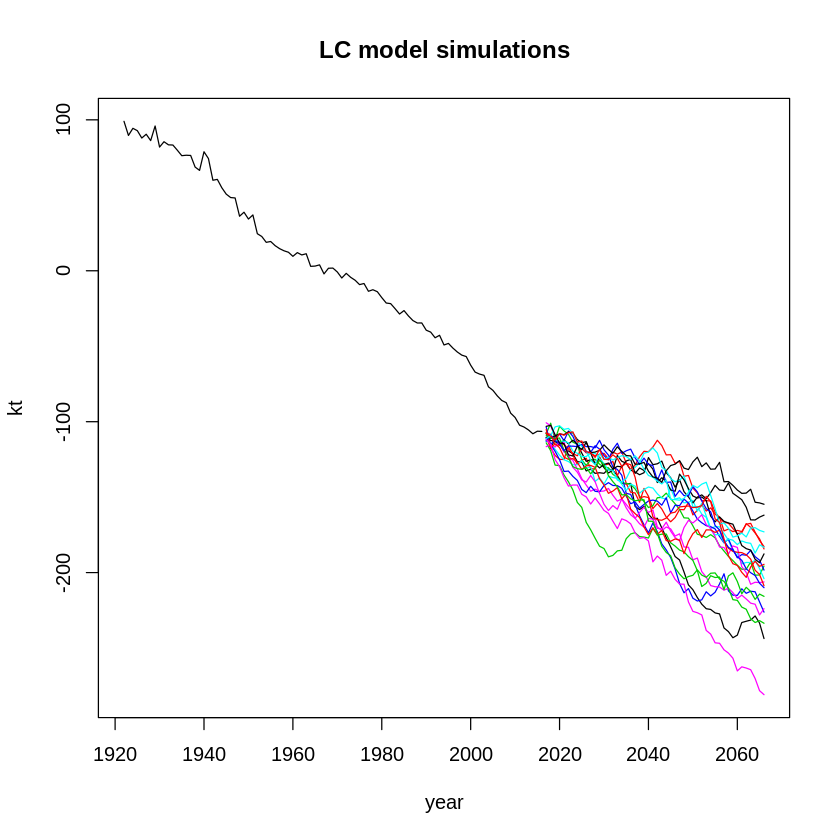

In [101]:
## Afficher les différents simulations de Kt en fonctions d'année
plot(LCfitf$years, LCfitf$kt[1, ], xlim = range(LCfitf$years, LCsim$kt.s$years), ylim = range(LCfitf$kt, LCsim$kt.s$sim[1, , 1:20]), type = "l",xlab = "year", ylab = "kt", main = "LC model simulations")
matlines(LCsim$kt.s$years, LCsim$kt.s$sim[1, , 1:20], type = "l",lty = 1)

### On remarque pour les différents simulations, que l'évolution temporelle du taux de mortalité va se diminuer encore au cours du temps.

### forcast CBD

In [96]:
# projection du taux de mortalité en utilisant le modéle Cairns Blake Dowd pour les prochaines 50 années
horizon=50
CBDforf <- forecast(CBDfitf, h = horizon,kt.method = "iarima")
CBDform <- forecast(CBDfitm, h = horizon,kt.method = "iarima")

In [97]:
CBDforf

Stochastic Mortality Model forecast
Call: forecast.fitStMoMo(object = CBDfitf, h = horizon, kt.method = "iarima")

Binomial model with predictor: logit q[x,t] = k1[t] + f2[x] k2[t]

kt model: iarima
   kt[1]: ARIMA(1,1,0) with drift
   kt[2]: ARIMA(0,2,1)
Jump-off method: fit
Data:  U.K
Series:  female
Years in forecast: 2017 - 2066
Ages in forecast: 0 - 89 

In [98]:
CBDform

Stochastic Mortality Model forecast
Call: forecast.fitStMoMo(object = CBDfitm, h = horizon, kt.method = "iarima")

Binomial model with predictor: logit q[x,t] = k1[t] + f2[x] k2[t]

kt model: iarima
   kt[1]: ARIMA(1,1,0) with drift
   kt[2]: ARIMA(1,2,2)
Jump-off method: fit
Data:  U.K
Series:  male
Years in forecast: 2017 - 2066
Ages in forecast: 0 - 89 

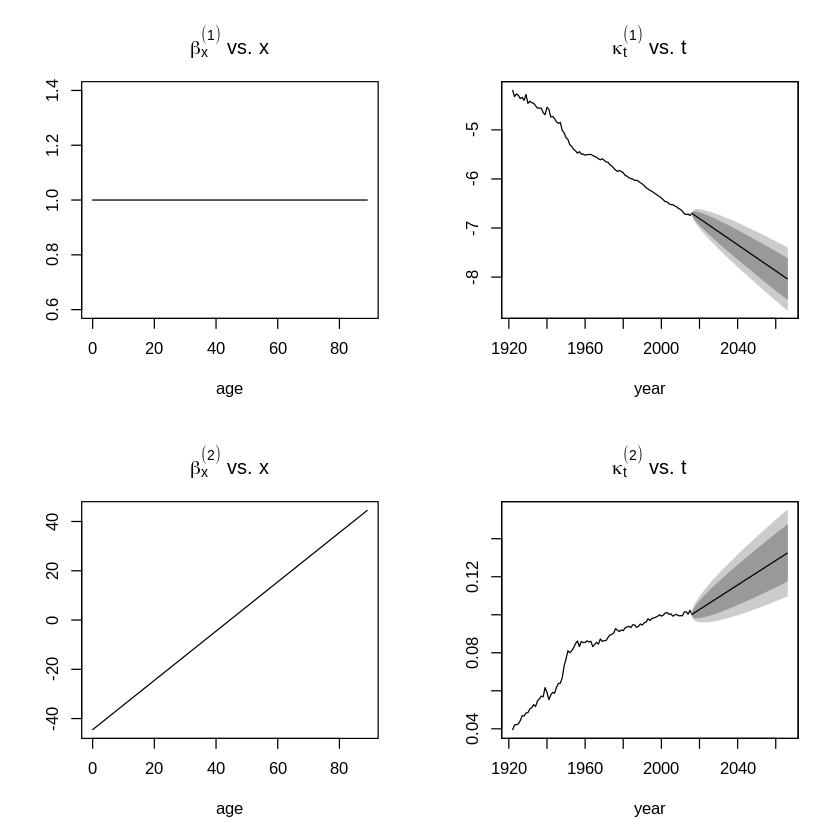

In [66]:
# Visualiser la projection 
plot(CBDforf)

### On remarque que la projection ne concerne que les paramétres kt1 et kt2. Le paramétre kt1 va continuer à diminuer selon la projection de Cairns Blake Dowd at parallélement kt2 va continuer à augmenter pendant les prochaines 50 années.

In [36]:
# Afficher les valeurs de taux de mortalité pour la projection de 50 ans
head(CBDfor$rates)

,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,⋯,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066
0,2.333177e-05,2.215376e-05,2.103522e-05,1.997316e-05,1.896472e-05,1.800719e-05,1.709801e-05,1.623473e-05,1.541504e-05,1.463674e-05,⋯,2.937139e-06,2.788841e-06,2.648030e-06,2.514330e-06,2.387380e-06,2.266839e-06,2.152385e-06,2.043710e-06,1.940521e-06,1.842543e-06
1,2.567499e-05,2.439378e-05,2.317650e-05,2.201996e-05,2.092113e-05,1.987713e-05,1.888523e-05,1.794283e-05,1.704745e-05,1.619676e-05,⋯,3.313197e-06,3.147861e-06,2.990776e-06,2.841529e-06,2.699730e-06,2.565007e-06,2.437007e-06,2.315395e-06,2.199851e-06,2.090073e-06
2,2.825354e-05,2.686028e-05,2.553573e-05,2.427650e-05,2.307936e-05,2.194125e-05,2.085927e-05,1.983064e-05,1.885273e-05,1.792305e-05,⋯,3.737405e-06,3.553100e-06,3.377884e-06,3.211308e-06,3.052946e-06,2.902394e-06,2.759266e-06,2.623197e-06,2.493837e-06,2.370857e-06
3,3.109104e-05,2.957617e-05,2.813512e-05,2.676428e-05,2.546023e-05,2.421971e-05,2.303964e-05,2.191706e-05,2.084917e-05,1.983332e-05,⋯,4.215926e-06,4.010507e-06,3.815096e-06,3.629207e-06,3.452375e-06,3.284159e-06,3.124139e-06,2.971917e-06,2.827111e-06,2.689361e-06
4,3.421350e-05,3.256667e-05,3.099910e-05,2.950699e-05,2.808670e-05,2.673477e-05,2.544791e-05,2.422299e-05,2.305703e-05,2.194720e-05,⋯,4.755715e-06,4.526797e-06,4.308899e-06,4.101489e-06,3.904062e-06,3.716139e-06,3.537262e-06,3.366994e-06,3.204923e-06,3.050653e-06
5,3.764953e-05,3.585952e-05,3.415461e-05,3.253076e-05,3.098410e-05,2.951099e-05,2.810790e-05,2.677153e-05,2.549869e-05,2.428636e-05,⋯,5.364615e-06,5.109552e-06,4.866616e-06,4.635230e-06,4.414846e-06,4.204939e-06,4.005013e-06,3.814592e-06,3.633226e-06,3.460482e-06


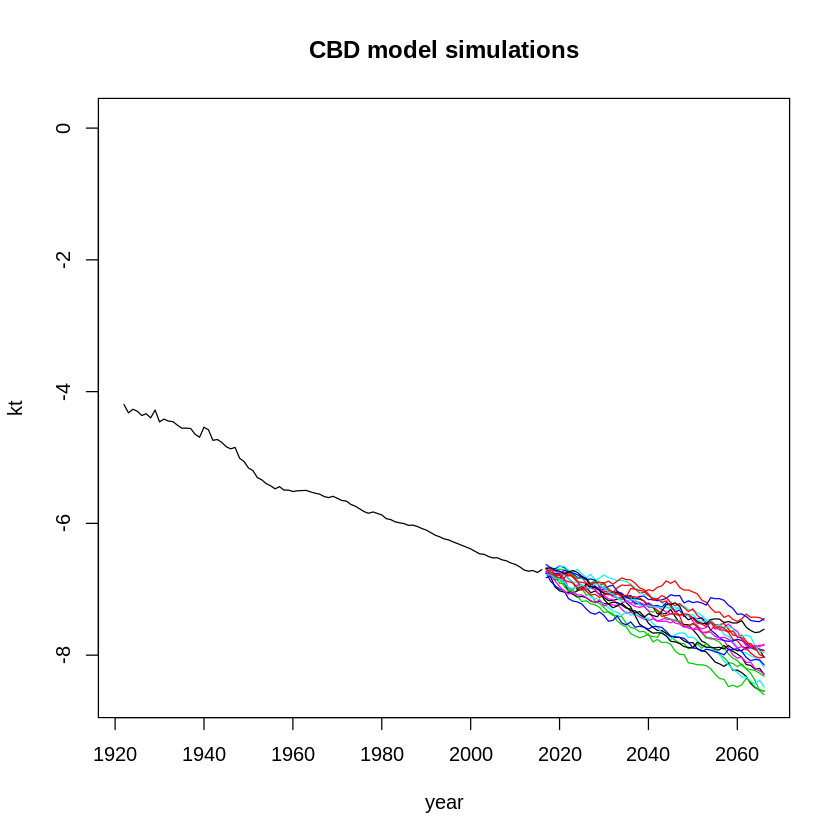

In [103]:
## Afficher les différents simulations de Kt en fonctions d'année
CBDsim <- simulate(CBDfitf, nsim = 20, h = 50)
plot(CBDfitf$years, CBDfitf$kt[1, ], xlim = range(CBDfitf$years, CBDsim$kt.s$years), ylim = range(CBDfitf$kt, CBDsim$kt.s$sim[1, , 1:20]), type = "l",xlab = "year", ylab = "kt", main = "CBD model simulations")
matlines(CBDsim$kt.s$years, CBDsim$kt.s$sim[1, , 1:20], type = "l",lty = 1)

# 9. Comparer la Valeur Actuelle Probable d’une rente viagère à termes anticipés contractée en 2020 par un assuré de 65 ans, selon le modèle utiliser pour projeter les taux de mortalité.

## 9.1 la Valeur Actuelle Probable d’une rente viagère à termes anticipés à l'aide de Lee Carter

### Afin de calculer VAP d'une rente viagére, il faut détérminer la cohorte qui est 2020-65=1955

### Cas serie total

In [38]:
# Convertir le taux de mortalité en probabilité de décés pour la cohorte 1995 en utilisant celle calculé par Lee Carter
lc_1955=k[, c('1955')]
qx_1955<-mx2qx(lc_1955)
qx_1955

0            1            2            3            4            5 
0.0247834170 0.0022474030 0.0012776171 0.0009670538 0.0007931555 0.0007156351 
           6            7            8            9           10           11 
0.0006249393 0.0005442706 0.0004943156 0.0004613706 0.0004446297 0.0004412111 
          12           13           14           15           16           17 
0.0004665356 0.0005086623 0.0005815522 0.0006868373 0.0008507098 0.0010473371 
          18           19           20           21           22           23 
0.0011614338 0.0012183969 0.0012559558 0.0012852481 0.0012958040 0.0013092283 
          24           25           26           27           28           29 
0.0013167704 0.0013310737 0.0013576752 0.0013822865 0.0014194532 0.0014662212 
          30           31           32           33           34           35 
0.0015182822 0.0015418735 0.0016598343 0.0017108110 0.0018141907 0.0019393131 
          36           37           38           39           40           41 
0.0020401908 0.0021681831 0.0023668846 0.0025362167 0.0027244190 0.0028747372 
          42           43           44           45           46           47 
0.0032658081 0.0034424292 0.0037154792 0.0041107853 0.0044564637 0.0049050288 
          48           49           50           51           52           53 
0.0053644026 0.0059488608 0.0064724561 0.0068164750 0.0077878639 0.0084551873 
          54           55           56           57           58           59 
0.0092805301 0.0097825409 0.0110204032 0.0120002010 0.0133740624 0.0146032150 
          60           61           62           63           64           65 
0.0158612324 0.0169077912 0.0192634768 0.0211400647 0.0232353712 0.0253706545 
          66           67           68           69           70           71 
0.0267638464 0.0299650030 0.0328899316 0.0362193470 0.0394377645 0.0420263937 
          72           73           74           75           76           77 
0.0480166171 0.0525385697 0.0576602548 0.0625469606 0.0687110486 0.0736451369 
          78           79           80 
0.0812663324 0.0884215446 0.0951886028

In [39]:
# Création d'une nouvelle table de survie en utilisant la probabilité de décés
lc_lifetable_1955<-probs2lifetable(probs=qx_1955,type = "qx",name = paste("LC","1955","lt",sep="_"))
print(lc_lifetable_1955)

Life table LC_1955_lt 

    x        lx        px         ex
1   0 10000.000 0.9752166 68.0934568
2   1  9752.166 0.9977526 68.8239325
3   2  9730.249 0.9987224 67.9789560
4   3  9717.817 0.9990329 67.0659182
5   4  9708.420 0.9992068 66.1308373
6   5  9700.719 0.9992844 65.1833310
7   6  9693.777 0.9993751 64.2300118
8   7  9687.719 0.9994557 63.2701768
9   8  9682.446 0.9995057 62.3046316
10  9  9677.660 0.9995386 61.3354450
11 10  9673.195 0.9995554 60.3637565
12 11  9668.894 0.9995588 59.3906079
13 12  9664.628 0.9995335 58.4168233
14 13  9660.119 0.9994913 57.4440895
15 14  9655.206 0.9994184 56.4733240
16 15  9649.591 0.9993132 55.5061853
17 16  9642.963 0.9991493 54.5443353
18 17  9634.759 0.9989527 53.5907762
19 18  9624.669 0.9988386 52.6469626
20 19  9613.490 0.9987816 51.7081797
21 20  9601.777 0.9987440 50.7712576
22 21  9589.718 0.9987148 49.8351043
23 22  9577.393 0.9987042 48.8992372
24 23  9564.982 0.9986908 47.9626832
25 24  9552.459 0.9986832 47.0255596
26 25  9539.88

In [40]:
# Création d"une nouvelle table actuarielle avec taux d'interet de 1.5%
lc_act_1955<-new("actuarialtable",x=lc_lifetable_1955@x,lx=lc_lifetable_1955@lx, interest=0.015,name="LC")

In [42]:
help(new)

new {methods},R Documentation
Class,"either the name of a class, a character string, (the usual case) or the object describing the class (e.g., the value returned by getClass). Note that the character string passed from a generating function includes the package name as an attribute, avoiding ambiguity if two packages have identically named classes."
...,"arguments to specify properties of the new object, to be passed to initialize()."
.Object,An object: see the “Initialize Methods” section.


In [41]:
print(lc_act_1955)

Actuarial table  LC interest rate  1.5 % 

    x        lx         Dx          Nx         Cx        Mx          Rx
1   0 10000.000 10000.0000 424037.7620 244.171596 3733.4321 233880.6854
2   1  9752.166  9608.0452 414037.7620  21.274039 3489.2605 230147.2533
3   2  9730.249  9444.7803 404429.7169  11.888485 3467.9865 226657.9928
4   3  9717.817  9293.3138 394984.9366   8.854320 3456.0980 223190.0064
5   4  9708.420  9147.1198 385691.6228   7.147870 3447.2436 219733.9084
6   5  9700.719  9004.7929 376544.5030   6.348912 3440.0958 216286.6647
7   6  9693.777  8865.3682 367539.7101   5.458440 3433.7469 212846.5690
8   7  9687.719  8728.8945 358674.3419   4.680670 3428.2884 209412.8221
9   8  9682.446  8595.2154 349945.4474   4.185959 3423.6078 205984.5337
10  9  9677.660  8464.0065 341350.2321   3.847334 3419.4218 202560.9259
11 10  9673.195  8335.0753 332886.2256   3.651253 3415.5745 199141.5041
12 11  9668.894  8208.2456 324551.1502   3.568048 3411.9232 195725.9297
13 12  9664.628  8083

In [42]:
# Calculer la valeur Actuelle Probable d’une rente viagère à termes anticipés pour l'age 65 à partir d'un tableau actuariel de l'année 1955
axn(actuarialtable = lc_act_1955,65)

[1] 11.28994

### Cas serie homme

In [86]:
lc_1955m=km[, c('1955')]
qx_1955m<-mx2qx(lc_1955m)
lc_lifetable_1955m<-probs2lifetable(probs=qx_1955m,type = "qx",name = paste("LC","1955","lt",sep="_"))
lc_act_1955m<-new("actuarialtable",x=lc_lifetable_1955m@x,lx=lc_lifetable_1955m@lx, interest=0.015,name="LC")
axn(actuarialtable = lc_act_1955m,65)

[1] 10.51475

### Cas serie femme

In [87]:
lc_1955f=kf[, c('1955')]
qx_1955f<-mx2qx(lc_1955f)
lc_lifetable_1955f<-probs2lifetable(probs=qx_1955f,type = "qx",name = paste("LC","1955","lt",sep="_"))
lc_act_1955f<-new("actuarialtable",x=lc_lifetable_1955f@x,lx=lc_lifetable_1955f@lx, interest=0.015,name="LC")
axn(actuarialtable = lc_act_1955f,65)

[1] 11.91917

## 9.2 la Valeur Actuelle Probable d’une rente viagère à termes anticipés à l'aide de Cairns Blake Dowd

In [43]:
# Convertir le taux de mortalité en probabilité de décés pour la cohorte 1995 en utilisant celle calculé par Cairns Blake Dowd
cbd_1955=c[, c('1955')]
cbd_qx_1955<-mx2qx(cbd_1955)
cbd_qx_1955

55         56         57         58         59         60         61 
0.01005162 0.01108901 0.01223147 0.01348921 0.01487335 0.01639595 0.01807009 
        62         63         64         65         66         67         68 
0.01990995 0.02193080 0.02414911 0.02658255 0.02925003 0.03217174 0.03536910 
        69         70         71         72         73         74         75 
0.03886476 0.04268255 0.04684738 0.05138514 0.05632250 0.06168670 0.06750529 
        76         77         78         79         80         81         82 
0.07380576 0.08061516 0.08795958 0.09586367 0.10434995 0.11343818 0.12314460 
        83         84         85         86         87         88         89 
0.13348116 0.14445476 0.15606644 0.16831067 0.18117467 0.19463788 0.20867152

In [44]:
# Création d'une nouvelle table de survie en utilisant la probabilité de décés
cbd_lifetable_1955<-probs2lifetable(probs=cbd_qx_1955,type = "qx",name = paste("CBD","1955","UK",sep="_"))
print(cbd_lifetable_1955)

Life table CBD_1955_UK 

    x         lx        px         ex
1   0 10000.0000 0.9899484 20.2604825
2   1  9899.4838 0.9889110 19.4662009
3   2  9789.7084 0.9877685 18.6844822
4   3  9669.9659 0.9865108 17.9158509
5   4  9539.5257 0.9851267 17.1608261
6   5  9397.6410 0.9836041 16.4199186
7   6  9243.5578 0.9819299 15.6936264
8   7  9076.5258 0.9800901 14.9824304
9   8  8895.8127 0.9780692 14.2867896
10  9  8700.7204 0.9758509 13.6071357
11 10  8490.6058 0.9734175 12.9438677
12 11  8264.9038 0.9707500 12.2973450
13 12  8023.1551 0.9678283 11.6678809
14 13  7765.0363 0.9646309 11.0557349
15 14  7490.3939 0.9611352 10.4611039
16 15  7199.2816 0.9573175  9.8841122
17 16  6891.9979 0.9531526  9.3248010
18 17  6569.1259 0.9486149  8.7831143
19 18  6231.5704 0.9436775  8.2588833
20 19  5880.5928 0.9383133  7.7518070
21 20  5517.8384 0.9324947  7.2614272
22 21  5145.3551 0.9261942  6.7870975
23 22  4765.5982 0.9193848  6.3279418
24 23  4381.4188 0.9120404  5.8827998
25 24  3996.0310 0.904136

In [45]:
# Création d"une nouvelle table actuarielle avec taux d'interet de 1.5%
cbd_act_1955<-new("actuarialtable",x=cbd_lifetable_1955@x,lx=cbd_lifetable_1955@lx, interest=0.015,name="CBD")

In [46]:
print(cbd_act_1955)

Actuarial table  CBD interest rate  1.5 % 

    x         lx         Dx          Nx        Cx        Mx          Rx
1   0 10000.0000 10000.0000 178824.7432  99.03069 7357.2698 146850.0421
2   1  9899.4838  9753.1861 168824.7432 106.55482 7258.2391 139492.7723
3   2  9789.7084  9502.4955 159071.5572 114.51179 7151.6843 132234.5331
4   3  9669.9659  9247.5527 149569.0617 122.89871 7037.1725 125082.8489
5   4  9539.5257  8987.9907 140321.5090 131.70592 6914.2738 118045.6764
6   5  9397.6410  8723.4573 131333.5183 140.91560 6782.5679 111131.4026
7   6  9243.5578  8453.6236 122610.0610 150.50026 6641.6523 104348.8347
8   7  9076.5258  8178.1929 114156.4374 160.42108 6491.1520  97707.1824
9   8  8895.8127  7896.9119 105978.2445 170.62620 6330.7309  91216.0304
10  9  8700.7204  7609.5825  98081.3326 181.04889 6160.1047  84885.2995
11 10  8490.6058  7316.0768  90471.7501 191.60586 5979.0558  78725.1948
12 11  8264.9038  7016.3515  83155.6733 202.19559 5787.4500  72746.1390
13 12  8023.1551  67

In [90]:
# Calculer la valeur Actuelle Probable d’une rente viagère à termes anticipés pour l'age 65 à partir d'un tableau actuariel de l'année 1955
cat("la valeur de VAP de CBD est",axn(actuarialtable = cbd_act_1955,65))

ERROR: Error in class(actuarialtable) %in% c("lifetable", "actuarialtable"): object 'cbd_act_1955' not found


### Cas homme

In [89]:
cbd_1955m=cm[, c('1955')]
cbd_qx_1955m<-mx2qx(cbd_1955m)
cbd_lifetable_1955m<-probs2lifetable(probs=cbd_qx_1955m,type = "qx",name = paste("CBD","1955","UK",sep="_"))
cbd_act_1955m<-new("actuarialtable",x=cbd_lifetable_1955m@x,lx=cbd_lifetable_1955m@lx, interest=0.015,name="CBD")
axn(actuarialtable = cbd_act_1955m,65)


[1] 10.59681

### Cas femme

In [90]:
cbd_1955f=cf[, c('1955')]
cbd_qx_1955f<-mx2qx(cbd_1955f)
cbd_lifetable_1955f<-probs2lifetable(probs=cbd_qx_1955f,type = "qx",name = paste("CBD","1955","UK",sep="_"))
cbd_act_1955f<-new("actuarialtable",x=cbd_lifetable_1955f@x,lx=cbd_lifetable_1955f@lx, interest=0.015,name="CBD")
axn(actuarialtable = cbd_act_1955f,65)

[1] 11.90567

### En comparant la valeur Actuelle Probable d’une rente viagère à termes anticipés pour l'age 65 pour l'année 2020 en utilisant les deux modéles lee carter et Cairns Blake Dowd, on trouve presque les memes valeurs avec une différence négligeable.
### On peut expliquer ce résultat en se référant au comparaison du comportement de log taux moyen de mortalité de chaque  modéle pour les différents années et on a conclus qu'ils ont des valeurs similaires pour les personnes qui atteint l'age de la retraite.
### On remarque aussi pour le calcul du vap en utilisant les deux modéles que le vap des femmes et toujours supérieurs que celle des hommes.